In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("ksprojects_2018.csv")

In [3]:
df=data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [6]:
df.name=pd.Categorical(df.name)
df.category=pd.Categorical(df.category)
df.main_category=pd.Categorical(df.main_category)
df.currency=pd.Categorical(df.currency)
df.deadline=pd.Categorical(df.deadline)
df.state=pd.Categorical(df.state)
df.launched =pd.Categorical(df.launched )
df.country =pd.Categorical(df.country )

In [7]:
df.dtypes

ID                     int64
name                category
category            category
main_category       category
currency            category
deadline            category
goal                 float64
launched            category
pledged              float64
state               category
backers                int64
country             category
usd pledged          float64
usd_pledged_real     float64
usd_goal_real        float64
dtype: object

In [8]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [10]:
df.shape

(378661, 15)

In [11]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,378661.0,1.074731e+09,6.190862e+08,5971.00,5.382635e+08,1.075276e+09,1.610149e+09,2.147476e+09
goal,378661.0,4.908079e+04,1.183391e+06,0.01,2.000000e+03,5.200000e+03,1.600000e+04,1.000000e+08
pledged,378661.0,9.682979e+03,9.563601e+04,0.00,3.000000e+01,6.200000e+02,4.076000e+03,2.033899e+07
backers,378661.0,1.056175e+02,9.071850e+02,0.00,2.000000e+00,1.200000e+01,5.600000e+01,2.193820e+05
usd pledged,374864.0,7.036729e+03,7.863975e+04,0.00,1.698000e+01,3.947200e+02,3.034090e+03,2.033899e+07
usd_pledged_real,378661.0,9.058924e+03,9.097334e+04,0.00,3.100000e+01,6.243300e+02,4.050000e+03,2.033899e+07
usd_goal_real,378661.0,4.545440e+04,1.152950e+06,0.01,2.000000e+03,5.500000e+03,1.550000e+04,1.663614e+08


In [13]:
pd.options.display.float_format = "{:.2f}".format #describeda ki e+ olarak çıkan verileri düzgün formata getirmek için.
# df.describe().apply(lambda s: s.apply('{0:.5f}'.format)) ikinci bir yöntem.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,378661.00,1074731191.99,619086204.32,5971.00,538263516.00,1075275634.00,1610148624.00,2147476221.00
goal,378661.00,49080.79,1183391.26,0.01,2000.00,5200.00,16000.00,100000000.00
pledged,378661.00,9682.98,95636.01,0.00,30.00,620.00,4076.00,20338986.27
backers,378661.00,105.62,907.19,0.00,2.00,12.00,56.00,219382.00
usd pledged,374864.00,7036.73,78639.75,0.00,16.98,394.72,3034.09,20338986.27
usd_pledged_real,378661.00,9058.92,90973.34,0.00,31.00,624.33,4050.00,20338986.27
usd_goal_real,378661.00,45454.40,1152950.06,0.01,2000.00,5500.00,15500.00,166361390.71


In [15]:
df.isnull().values.any()

True

In [16]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [17]:
catdf= df.select_dtypes(include = ["category"])

In [18]:
catdf

,name,category,main_category,currency,deadline,launched,state,country
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,GB
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,US
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,US
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,US
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,US
...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,2014-09-17 02:35:30,canceled,US
378657,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,failed,US
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,failed,US
378659,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,2016-01-13 18:13:53,failed,US


In [19]:
catdf["category"].value_counts().count()

159

In [20]:
catdf.category.unique()

[Poetry, Narrative Film, Music, Film & Video, Restaurants, ..., Literary Journals, Taxidermy, Literary Spaces, Chiptune, Residencies]
Length: 159
Categories (159, object): [Poetry, Narrative Film, Music, Film & Video, ..., Taxidermy, Literary Spaces, Chiptune, Residencies]

In [21]:
catdf["category"].value_counts()

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

In [22]:
catdf["main_category"].value_counts().count()

15

In [23]:
catdf["currency"].value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [24]:
catdf["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

KeyError: 'succesful'

In [25]:
catdf["country"].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [28]:
df=df[df.country!="N,0"] # N,0" hangi para birimi belli değil sildim o yüzden.

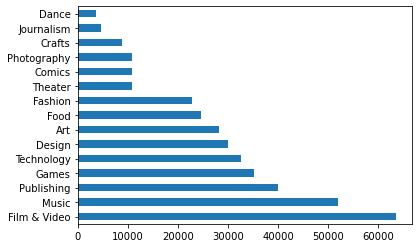

In [29]:
catdf["main_category"].value_counts().plot.barh()

In [30]:
df[df["ID"].duplicated()==True] # aynı id yok.

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3AE913BB0>,
      dtype=object)

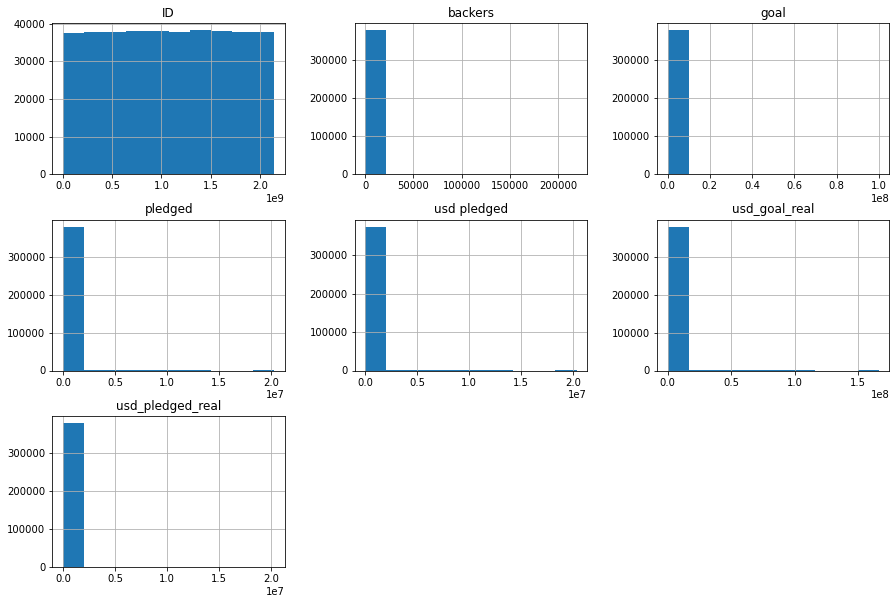

In [31]:
df.hist(figsize=(15,10))

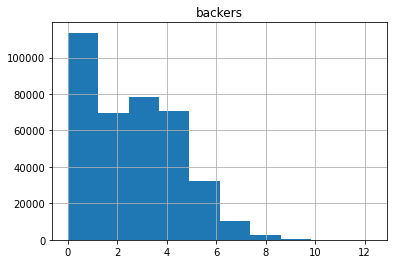

In [32]:
np.log(df.backers + 1).hist()
plt.title("backers")
plt.show()

In [33]:
df.groupby("backers").min()

,ID,goal,pledged,usd pledged,usd_pledged_real,usd_goal_real
backers,,,,,,
0,56833,0.01,0.00,0.00,0.00,0.01
1,48139,1.00,1.00,0.00,0.45,0.79
2,62304,1.00,2.00,0.00,1.05,0.55
3,75626,1.00,3.00,0.00,1.59,0.74
4,18520,1.00,4.00,0.00,2.34,0.77
...,...,...,...,...,...,...
87142,1929840910,400000.00,3336371.92,3336371.92,3336371.92,400000.00
91585,1755266685,2000000.00,5702153.38,5702153.38,5702153.38,2000000.00
105857,557230947,1000000.00,5408916.95,5408916.95,5408916.95,1000000.00


In [34]:
df.backers.describe().T

count   378661.00
mean       105.62
std        907.19
min          0.00
25%          2.00
50%         12.00
75%         56.00
max     219382.00
Name: backers, dtype: float64

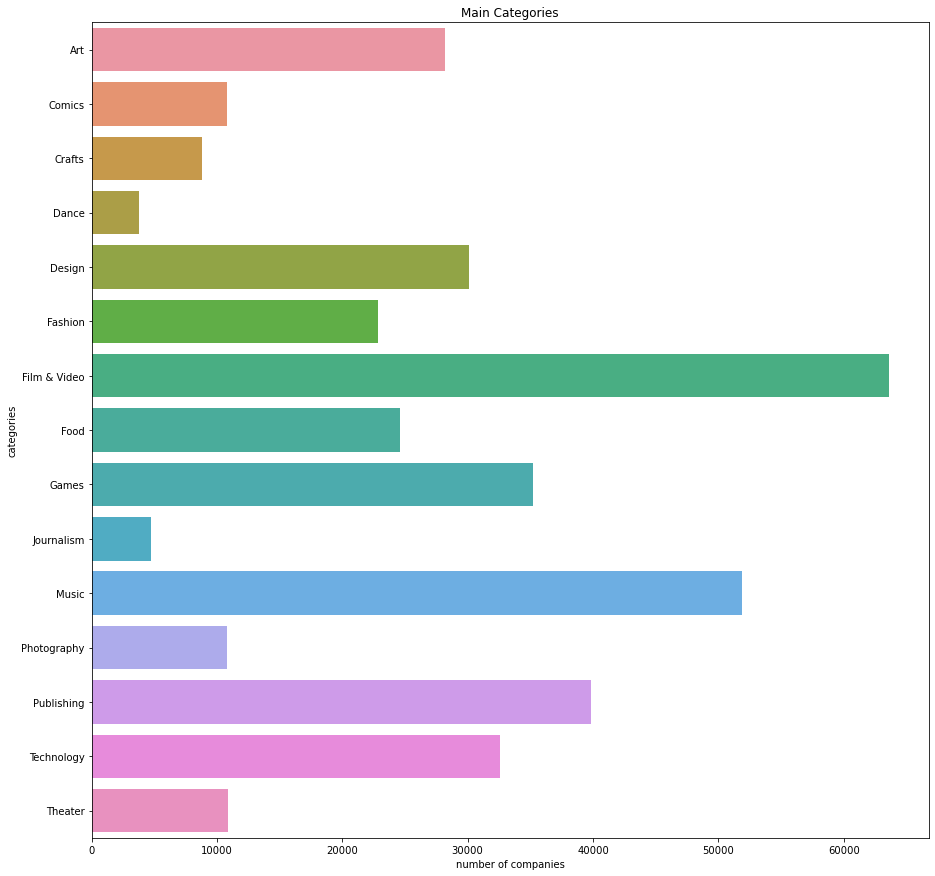

In [35]:
names = df.main_category.value_counts() 
fig = plt.figure(figsize=(15,15))
ax = sns.barplot( x=names.values,y=names.index) 
plt.title("Main Categories")
ax.set(xlabel="number of companies", ylabel='categories') 
plt.show()

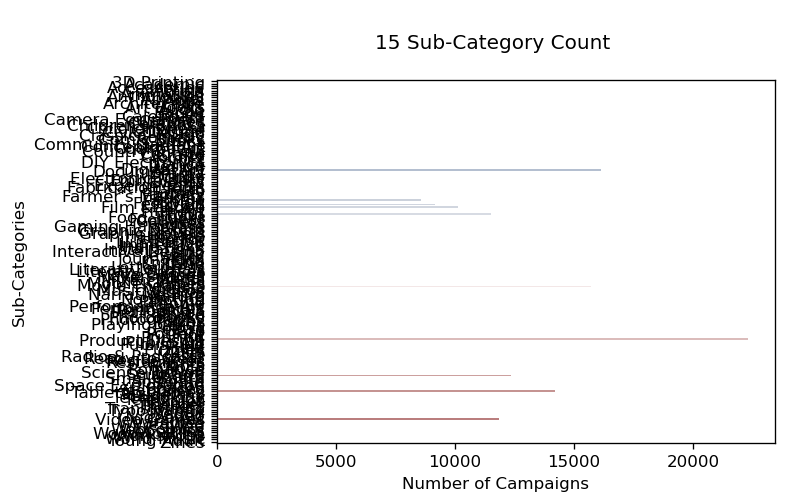

In [66]:
subcat = df.category.value_counts().head(10) 
fig = plt.figure(dpi=120) 
ax = fig.add_subplot(111) 
ax = sns.barplot(y=subcat.index, x=subcat.values, palette="vlag", alpha=0.8) 

plt.title("\n15 Sub-Category Count \n")
ax.set(xlabel="Number of Campaigns", ylabel="Sub-Categories") 
plt.show()

In [37]:
df.category.value_counts().head(10) 

Product Design    22314
Documentary       16139
Music             15727
Tabletop Games    14180
Shorts            12357
Video Games       11830
Food              11493
Film & Video      10108
Fiction            9169
Fashion            8554
Name: category, dtype: int64

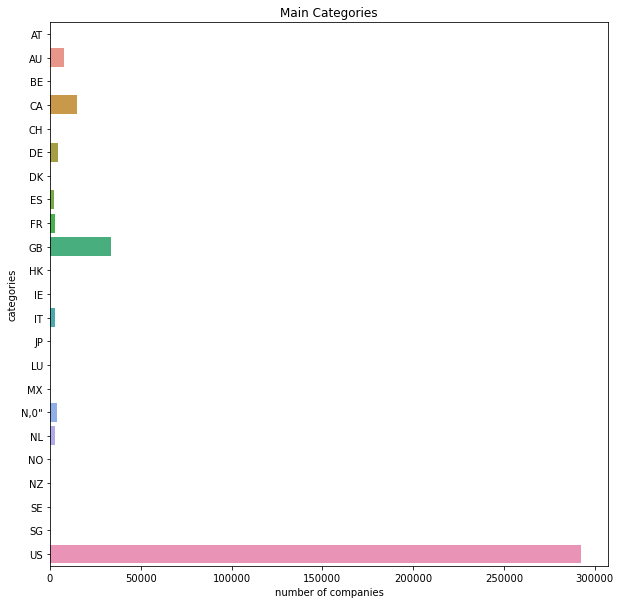

In [38]:
names = df.country.value_counts().head(10) 
fig = plt.figure(figsize=(10,10))
ax = sns.barplot( x=names.values,y=names.index) 
plt.title("Main Categories")
ax.set(xlabel="number of companies", ylabel='categories') 
plt.show()

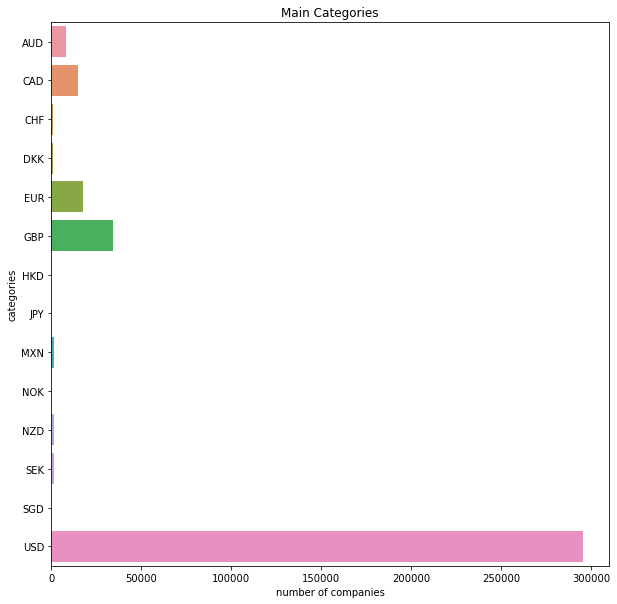

In [39]:
names = df.currency.value_counts().head(10) 
fig = plt.figure(figsize=(10,10))
ax = sns.barplot( x=names.values,y=names.index) 
plt.title("Main Categories")
ax.set(xlabel="number of companies", ylabel='categories') 
plt.show()

In [40]:
df["day_difference"] = (pd.to_datetime(df["deadline"]) - pd.to_datetime(df["launched"])).dt.days 
df["launch_year"]=pd.to_datetime(df["launched"], format="%Y/%m/%d").dt.year 


In [41]:
df.launch_year.value_counts()

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Name: launch_year, dtype: int64

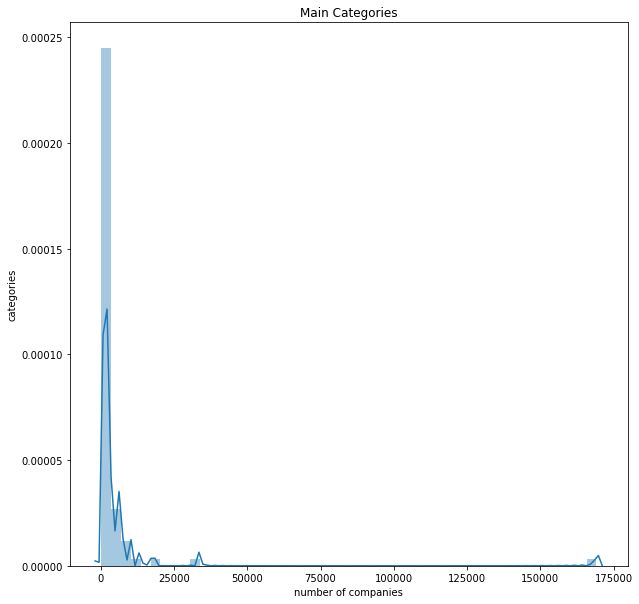

In [42]:
names = df.day_difference.value_counts()
fig = plt.figure(figsize=(10,10))
ax = sns.distplot( names) 
plt.title("Main Categories")
ax.set(xlabel="number of companies", ylabel='categories') 
plt.show()

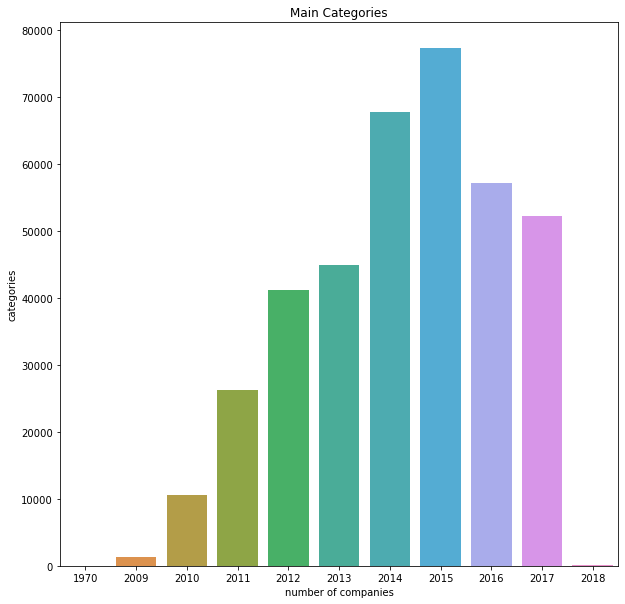

In [43]:
names = df.launch_year.value_counts()
fig = plt.figure(figsize=(10,10))
ax = sns.barplot( x=names.index,y=names.values) 
plt.title("Main Categories")
ax.set(xlabel="number of companies", ylabel='categories') 
plt.show()

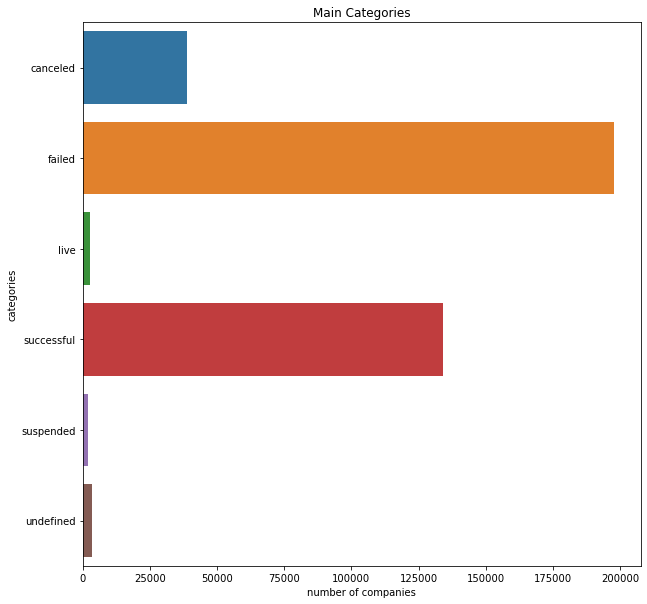

In [44]:
names = df.state.value_counts().head(10) 
fig = plt.figure(figsize=(10,10))
ax = sns.barplot( x=names.values,y=names.index) 
plt.title("Main Categories")
ax.set(xlabel="number of companies", ylabel='categories') 
plt.show()

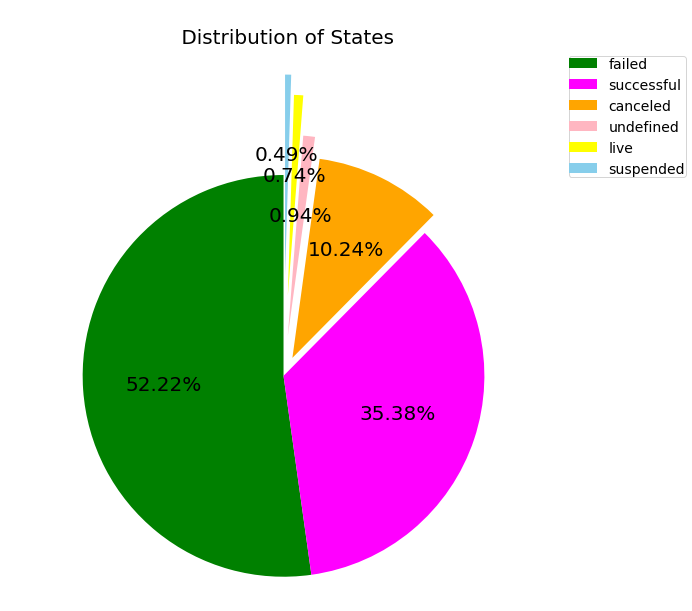

In [95]:


state = df.state.value_counts() 
labels = state.index
sizes = state.values 
colors = ['Green','Magenta','Orange','LightPink','Yellow', 'SkyBlue'] 
explode = [0,0,.1,.2,.4,.5]

fig1, ax1 = plt.subplots(figsize = (8, 8)) 

patches, texts, autotext = ax1.pie(sizes, colors = colors, startangle=90, autopct='%0.2f%%', explode = explode,
 textprops={'fontsize': 20}) 

ax1.axis("equal")  
plt.tight_layout()
plt.legend(labels,loc= 2,borderpad=0.05, fontsize = 14, bbox_to_anchor=(1,1))  
plt.title('\n Distribution of States', fontsize = 20) 

plt.show()

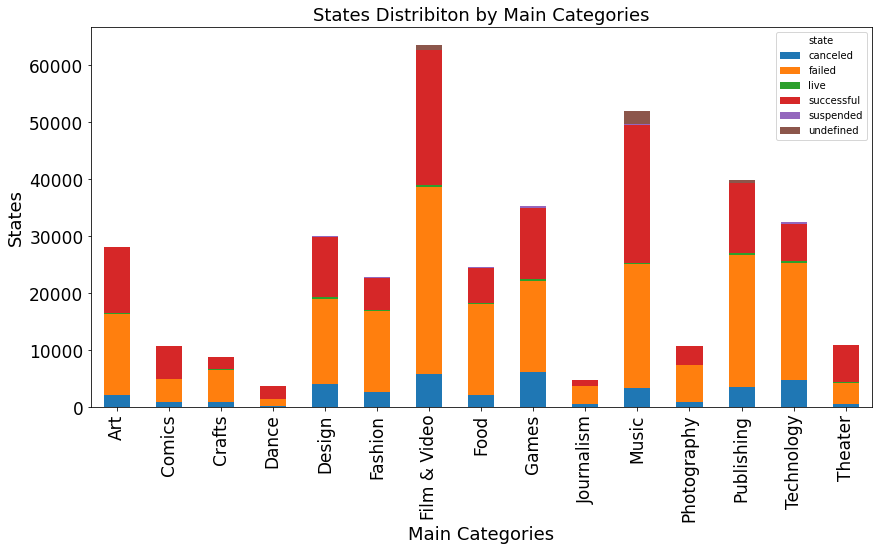

In [63]:
ax1 = plt.subplot(111)
df.groupby(["main_category", "state"])["state"].count().unstack().plot(kind='bar', figsize=(14,7), stacked=True, ax=ax1)

plt.title("States Distribiton by Main Categories", fontsize=18) 
plt.xlabel("Main Categories", fontsize=18)
plt.ylabel("States", fontsize=18)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.show()

In [77]:
!pip install wordcloud

In [91]:
df["state"].

0           failed
1           failed
2           failed
3           failed
4         canceled
            ...   
378656    canceled
378657      failed
378658      failed
378659      failed
378660      failed
Name: state, Length: 378661, dtype: category
Categories (6, object): [canceled, failed, live, successful, suspended, undefined]

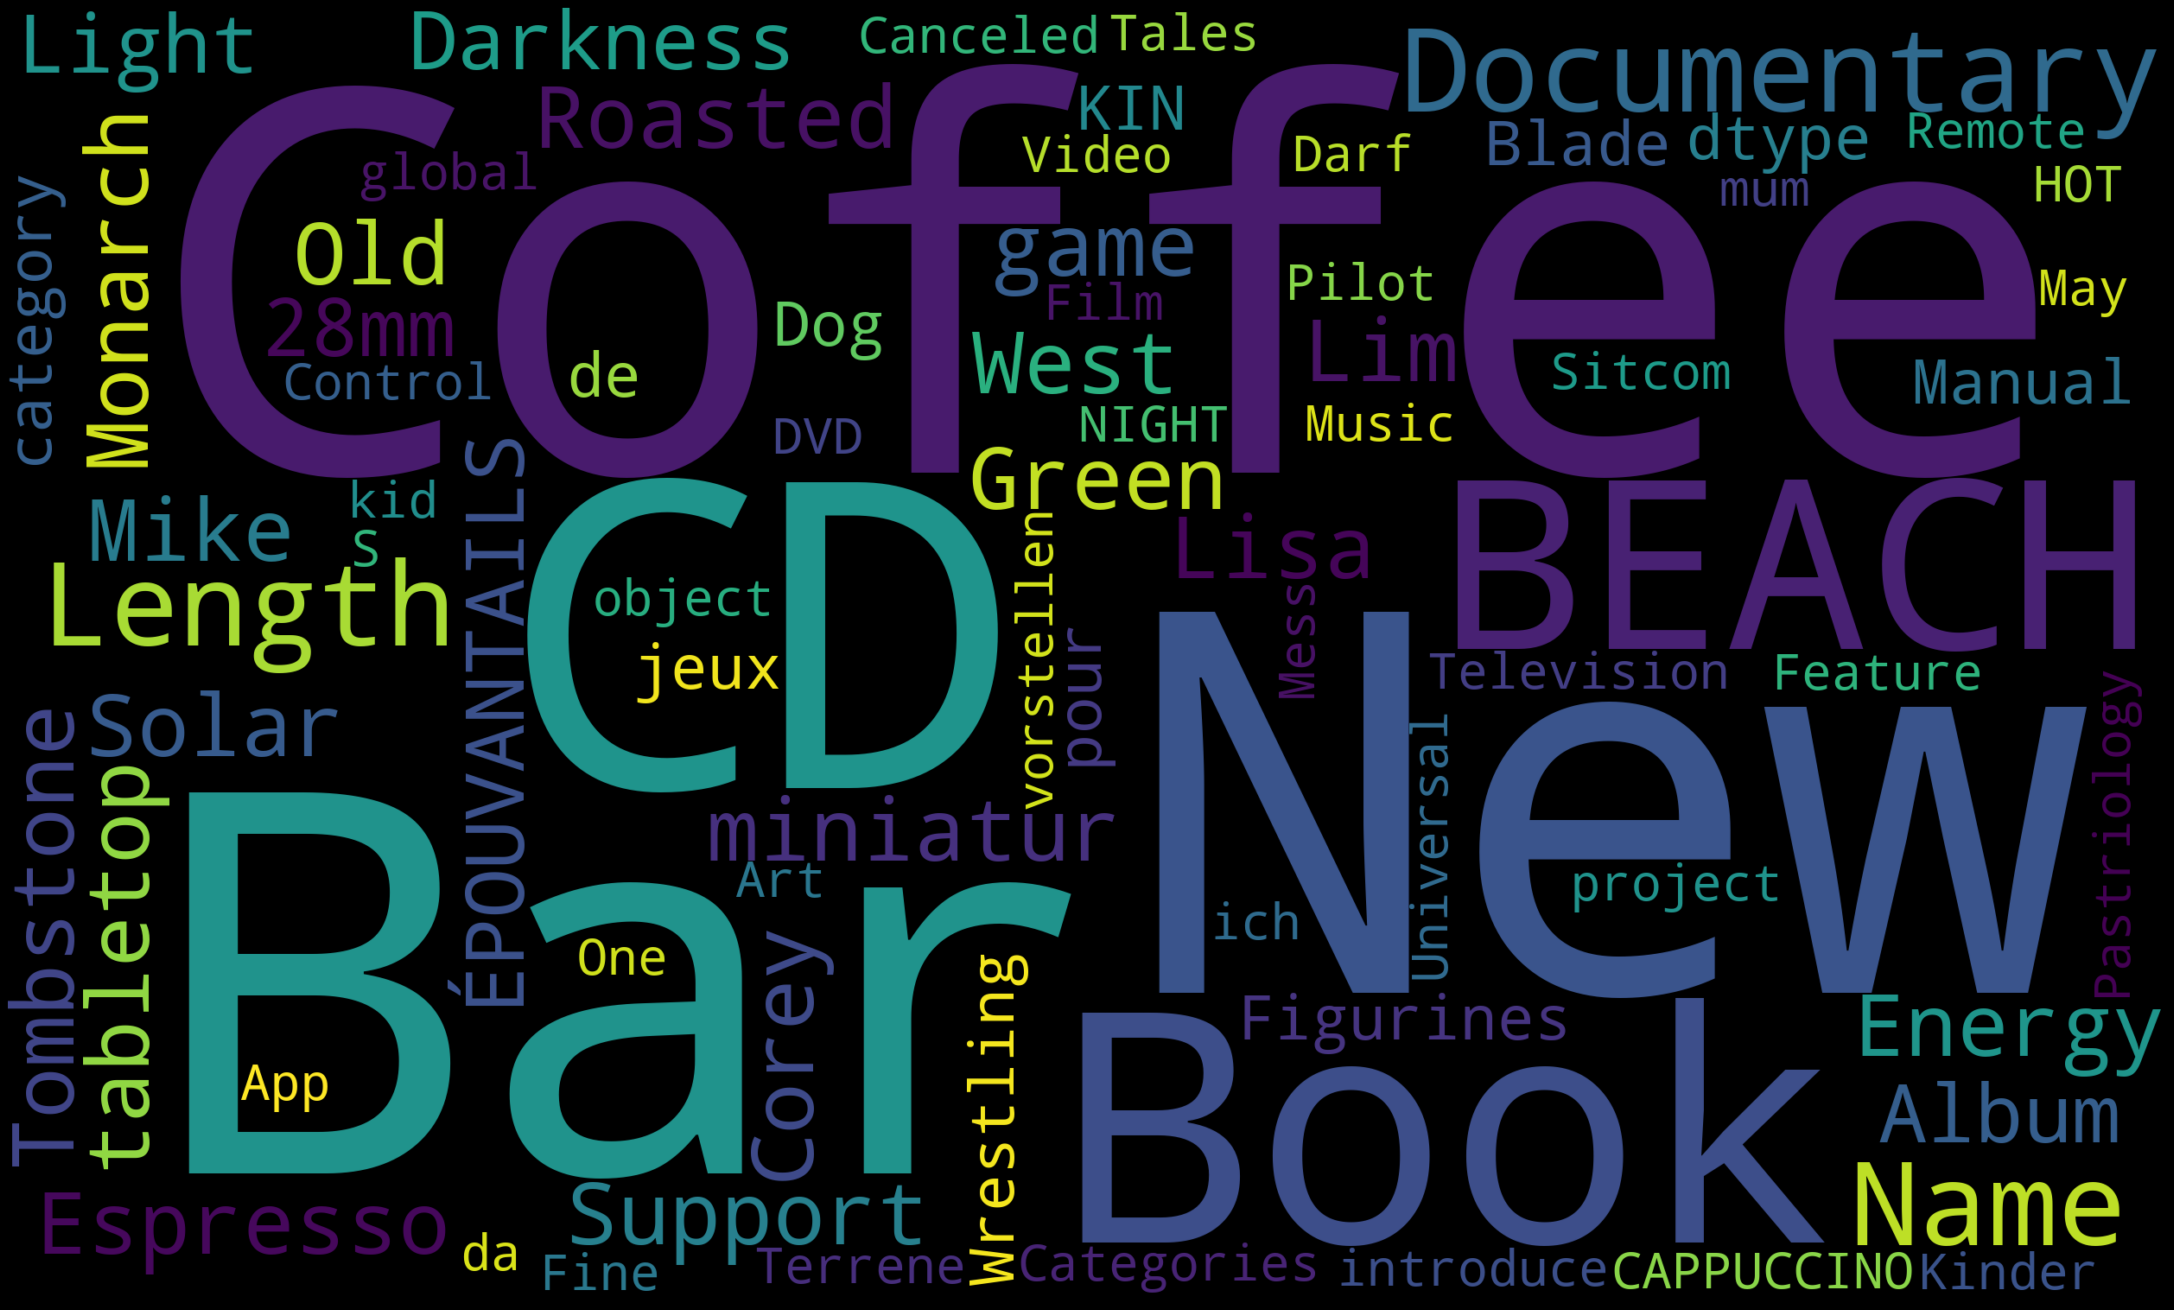

In [100]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words = df.loc[df.state=="successful"].name 

wordcloud = WordCloud(
    width = 2500,
    height = 1500,
    max_words = 150,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(words)) 
fig = plt.figure(
    figsize = (30, 30),
    facecolor = 'k',
    edgecolor = 'k') #figsize and colors
plt.imshow(wordcloud, interpolation = 'bilinear') 
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

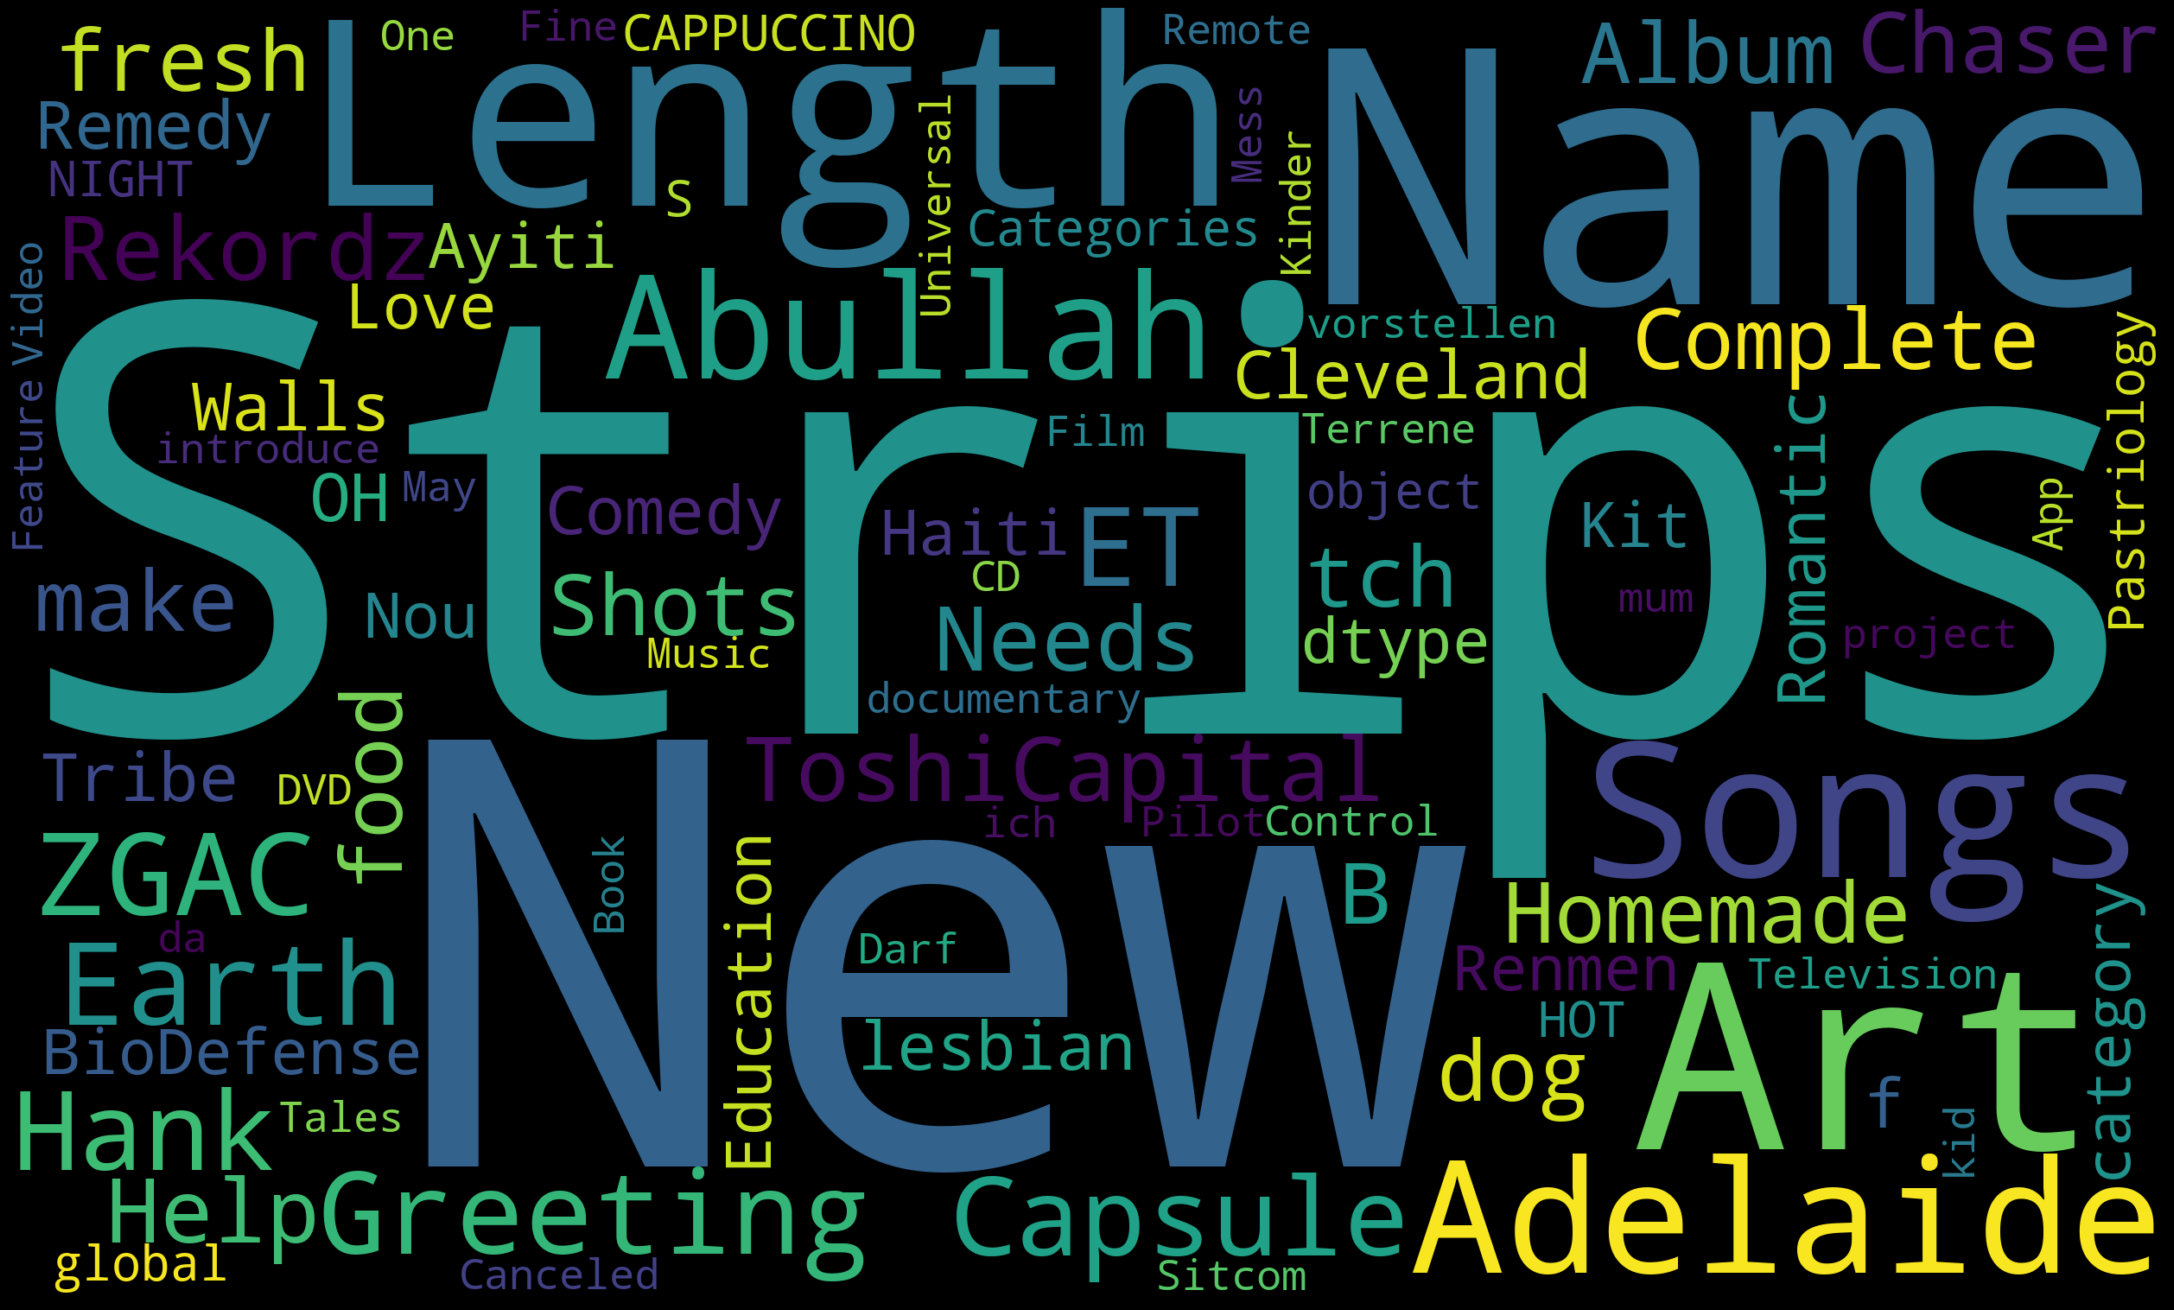

In [99]:
words = df.loc[df.state=="failed"].name 
wordcloud = WordCloud(
    width = 2500,
    height = 1500,
    max_words = 150,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(words)) 
fig = plt.figure(
    figsize = (30, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# tahmin için correlation'a bakıp işe yarayabilecek yeni özellikler ekledim.

In [64]:
df.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,day_difference,launch_year,pledge_per_backer,diff_goal_pledged
ID,1.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
goal,0.00,1.00,0.01,0.00,0.01,0.01,0.94,0.00,0.02,-0.02,0.16
pledged,0.00,0.01,1.00,0.72,0.86,0.95,0.01,0.00,0.03,0.10,0.11
backers,0.00,0.00,0.72,1.00,0.70,0.75,0.00,-0.00,0.02,0.07,0.12
usd pledged,-0.00,0.01,0.86,0.70,1.00,0.91,0.01,0.00,-0.01,0.09,0.15
usd_pledged_real,-0.00,0.01,0.95,0.75,0.91,1.00,0.01,0.00,0.02,0.10,0.16
usd_goal_real,0.00,0.94,0.01,0.00,0.01,0.01,1.00,0.00,0.01,-0.02,0.16
day_difference,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,1.00,-0.13,-0.01,0.02
launch_year,-0.00,0.02,0.03,0.02,-0.01,0.02,0.01,-0.13,1.00,-0.08,0.05
pledge_per_backer,-0.00,-0.02,0.10,0.07,0.09,0.10,-0.02,-0.01,-0.08,1.00,0.16


In [47]:
df["pledge_per_backer"] = np.log((df["usd_pledged_real"]+1)/(df["backers"]+1))


In [48]:
df["pledge_per_backer"]

0        0.00
1        5.02
2        4.01
3        0.00
4        4.45
         ... 
378656   2.56
378657   3.26
378658   2.35
378659   3.36
378660   3.37
Name: pledge_per_backer, Length: 378661, dtype: float64

In [49]:
df["diff_goal_pledged"] = np.log((df["usd_goal_real"]+1)-(df["usd_pledged_real"]+1))

D:\Users\Samet\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Users\Samet\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
df["diff_goal_pledged"].min() #inf değerler çıktı o yüzden kullanamadım df_2 de.

-inf

In [51]:
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,day_difference,launch_year,pledge_per_backer,diff_goal_pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,58,2015,0.00,7.34
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,59,2017,5.02,10.22
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,44,2013,4.01,10.71
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,29,2012,0.00,8.52
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,55,2015,4.45,9.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.00,2014-09-17 02:35:30,25.00,canceled,1,US,25.00,25.00,50000.00,29,2014,2.56,10.82
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.00,2011-06-22 03:35:14,155.00,failed,5,US,155.00,155.00,1500.00,26,2011,3.26,7.20
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.00,2010-07-01 19:40:30,20.00,failed,1,US,20.00,20.00,15000.00,45,2010,2.35,9.61
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.00,2016-01-13 18:13:53,200.00,failed,6,US,200.00,200.00,15000.00,30,2016,3.36,9.60


In [52]:
df_2=df.copy()

In [53]:
# tahmin etme işlemi için gereksiz gördüğüm sütunları silip kalanlarla yeni df oluşturma.
gereksizler=["category","main_category","currency","deadline","goal","launched","pledged","usd pledged","usd_goal_real","name"]
gerekliler= ["ID","name","launch_year","day_difference","backers","pledge_per_backer","usd_pledged_real","diff_goal_pledged","country","state"]
df_2.drop(gereksizler, axis=1, inplace=True)


In [54]:
df_2

,ID,state,backers,country,usd_pledged_real,day_difference,launch_year,pledge_per_backer,diff_goal_pledged
0,1000002330,failed,0,GB,0.00,58,2015,0.00,7.34
1,1000003930,failed,15,US,2421.00,59,2017,5.02,10.22
2,1000004038,failed,3,US,220.00,44,2013,4.01,10.71
3,1000007540,failed,1,US,1.00,29,2012,0.00,8.52
4,1000011046,canceled,14,US,1283.00,55,2015,4.45,9.81
...,...,...,...,...,...,...,...,...,...
378656,999976400,canceled,1,US,25.00,29,2014,2.56,10.82
378657,999977640,failed,5,US,155.00,26,2011,3.26,7.20
378658,999986353,failed,1,US,20.00,45,2010,2.35,9.61
378659,999987933,failed,6,US,200.00,30,2016,3.36,9.60


In [55]:
df_2['successful'] = np.where(df_2.state == 'successful', 1, 0) # succesful olanlar ve diğerleri diye ayırdım.

In [56]:
df_2.drop("state", axis=1, inplace=True)
df_2.drop("country", axis=1, inplace=True)
df_2.drop("ID", axis=1, inplace=True)
df_2.drop("diff_goal_pledged", axis=1, inplace=True)

In [57]:
df_2

,backers,usd_pledged_real,day_difference,launch_year,pledge_per_backer,successful
0,0,0.00,58,2015,0.00,0
1,15,2421.00,59,2017,5.02,0
2,3,220.00,44,2013,4.01,0
3,1,1.00,29,2012,0.00,0
4,14,1283.00,55,2015,4.45,0
...,...,...,...,...,...,...
378656,1,25.00,29,2014,2.56,0
378657,5,155.00,26,2011,3.26,0
378658,1,20.00,45,2010,2.35,0
378659,6,200.00,30,2016,3.36,0


In [58]:
df_2.isna().sum()

backers              0
usd_pledged_real     0
day_difference       0
launch_year          0
pledge_per_backer    0
successful           0
dtype: int64

In [59]:
df_2.corr()

,backers,usd_pledged_real,day_difference,launch_year,pledge_per_backer,successful
backers,1.00,0.75,-0.00,0.02,0.07,0.13
usd_pledged_real,0.75,1.00,0.00,0.02,0.10,0.11
day_difference,-0.00,0.00,1.00,-0.13,-0.01,-0.03
launch_year,0.02,0.02,-0.13,1.00,-0.08,-0.09
pledge_per_backer,0.07,0.10,-0.01,-0.08,1.00,0.44
successful,0.13,0.11,-0.03,-0.09,0.44,1.00


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [61]:
X = df_2.drop(['successful'], 1)
y = df_2.successful
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [62]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
predictions= knn.predict(X_test)
accuracy_score(y_test, predictions)

0.8306946773533335